# CST 383 - Final Project Update
    BayTech
- Warren Ngoun (wngoun@csumb.edu)
- Yukio Rivera (yrivera@csumb.edu)
- Jennah Yasin (jyasin@csumb.edu)
- Luis Jimenez Barrios (ljimenezbarrios@csumb.edu) 
---
### Table of Contents:
- [Intro](#intro)
    - Our choice of dataset
    - What we are going to predict
    - The features we plan to use as predictors
- [Preprocessing](#preprocessing)
- [Exploration & Visualization](#investigationexploration)
- [Preliminary work on Machine Learning](#training)
---

# Intro
[Back to Top](#table-of-contents)

We chose the Airline Passenger Satisfaction dataset for our final project because we are all interested in satisfying flight experiences and believe that it is important for airlines to take their passenger's reviews into consideration. 

With this dataset, we are going to predict what factors may be most relevant and most correlated to the passenger's satisfaction. We will be analyzing which features are most correlated to our topic and dropping those that aren't as relevant/needed. 

We plan to use the "satisfaction" feature as our target label for this project. 
The features that we plan to use as predictors for our project are: Seat comfort, in-flight entertainment, cleanliness, and food & drinks.

## Imports
    All the necessary imports we need for the project.

In [772]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# For ML Work
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import LabelEncoder # potentially unused

For our data frame, we have two files from the original Kaggle repo, a pre-split training and test csv, so we made two separate data frames and all the pre-processing and changes we do will be applied to both so later tests and predictions all have the same columns to draw from.

In [773]:
df = pd.read_csv('https://raw.githubusercontent.com/BayTech-CSUMB/CST383Final/main/train.csv')
dfTest = pd.read_csv('https://raw.githubusercontent.com/BayTech-CSUMB/CST383Final/main/test.csv')

# Preprocessing
[Back to Top](#table-of-contents)

First we do some preliminary looking at our dataset with `info()` and `describe()`.

In [774]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Our below describe shows us that a lot of our column data is from a range of 0.0 to 5.0, akin to a star rating. Others are in full ints like *flight distance* or *food and drink*. We will z-score normalize our data when we start the [Machine Learning training](#training).

In [775]:
df.describe().round(1)

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103904.0,103594.0
mean,51951.5,64924.2,39.4,1189.4,2.7,3.1,2.8,3.0,3.2,3.3,3.4,3.4,3.4,3.4,3.6,3.3,3.6,3.3,14.8,15.2
std,29994.6,37463.8,15.1,997.1,1.3,1.5,1.4,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.2,1.3,1.2,1.3,38.2,38.7
min,0.0,1.0,7.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,25975.8,32533.8,27.0,414.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
50%,51951.5,64856.5,40.0,843.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,0.0,0.0
75%,77927.2,97368.2,51.0,1743.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,12.0,13.0
max,103903.0,129880.0,85.0,4983.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1592.0,1584.0


Lets see which columns are categorical.

In [776]:
df.dtypes[df.dtypes == 'object']

Gender            object
Customer Type     object
Type of Travel    object
Class             object
satisfaction      object
dtype: object

For each of those above categories, lets investigate the values.

In [777]:
print(df['Gender'].value_counts())

Female    52727
Male      51177
Name: Gender, dtype: int64


In [778]:
print(df['Customer Type'].value_counts())

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64


In [779]:
print(df['Type of Travel'].value_counts())

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64


In [780]:
print(df['Class'].value_counts())

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64


In [781]:
print(df['Type of Travel'].value_counts())

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64


Now we'll go ahead and One-Hot Encode all of those categorical values (minus satisfaction which we'll do pre-[machine learning](#training)).

In [782]:
cols = ['Gender', 'Type of Travel', 'Class', 'Customer Type']

for col in cols:
    catCol = pd.get_dummies(df[col], prefix=col)
    df.drop(col, axis=1, inplace=True)
    df = pd.concat([df, catCol], axis=1)
    # Repeat but for our test data set too.
    catCol2 = pd.get_dummies(dfTest[col], prefix=col)
    dfTest.drop(col, axis=1, inplace=True)
    dfTest = pd.concat([dfTest, catCol2], axis=1)

Lets check out the different columns now.

In [783]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Flight Distance                    103904 non-null  int64  
 4   Inflight wifi service              103904 non-null  int64  
 5   Departure/Arrival time convenient  103904 non-null  int64  
 6   Ease of Online booking             103904 non-null  int64  
 7   Gate location                      103904 non-null  int64  
 8   Food and drink                     103904 non-null  int64  
 9   Online boarding                    103904 non-null  int64  
 10  Seat comfort                       103904 non-null  int64  
 11  Inflight entertainment             1039

In [784]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Age                                25976 non-null  int64  
 3   Flight Distance                    25976 non-null  int64  
 4   Inflight wifi service              25976 non-null  int64  
 5   Departure/Arrival time convenient  25976 non-null  int64  
 6   Ease of Online booking             25976 non-null  int64  
 7   Gate location                      25976 non-null  int64  
 8   Food and drink                     25976 non-null  int64  
 9   Online boarding                    25976 non-null  int64  
 10  Seat comfort                       25976 non-null  int64  
 11  Inflight entertainment             25976 non-null  int

In [785]:
print(f'There are {df.isna().sum().sum()} NaN values in df.')

There are 310 NaN values in df.


In [786]:
print(f'There are {dfTest.isna().sum().sum()} NaN values in our test df.')


There are 83 NaN values in our test df.


After our One-Hot Encoding, we went from 24 columns to 30 columns with the encoding.

In [787]:
df.tail(5)

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,satisfaction,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Customer Type_Loyal Customer,Customer Type_disloyal Customer
103899,103899,94171,23,192,2,1,2,3,2,2,...,neutral or dissatisfied,1,0,1,0,0,1,0,0,1
103900,103900,73097,49,2347,4,4,4,4,2,4,...,satisfied,0,1,1,0,1,0,0,1,0
103901,103901,68825,30,1995,1,1,1,3,4,1,...,neutral or dissatisfied,0,1,1,0,1,0,0,0,1
103902,103902,54173,22,1000,1,1,1,5,1,1,...,neutral or dissatisfied,1,0,1,0,0,1,0,0,1
103903,103903,62567,27,1723,1,3,3,3,1,1,...,neutral or dissatisfied,0,1,1,0,1,0,0,1,0


In [788]:
dfTest.tail(5)

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,satisfaction,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Customer Type_Loyal Customer,Customer Type_disloyal Customer
25971,25971,78463,34,526,3,3,3,1,4,3,...,neutral or dissatisfied,0,1,1,0,1,0,0,0,1
25972,25972,71167,23,646,4,4,4,4,4,4,...,satisfied,0,1,1,0,1,0,0,1,0
25973,25973,37675,17,828,2,5,1,5,2,1,...,neutral or dissatisfied,1,0,0,1,0,1,0,1,0
25974,25974,90086,14,1127,3,3,3,3,4,4,...,satisfied,0,1,1,0,1,0,0,1,0
25975,25975,34799,42,264,2,5,2,5,4,2,...,neutral or dissatisfied,1,0,0,1,0,1,0,1,0


We're interested in also trimming out unnecessary columns from the dataset so there are less potential noisy predictors. Here we have two correlation heat maps, one of before and after a purging.

<AxesSubplot:>

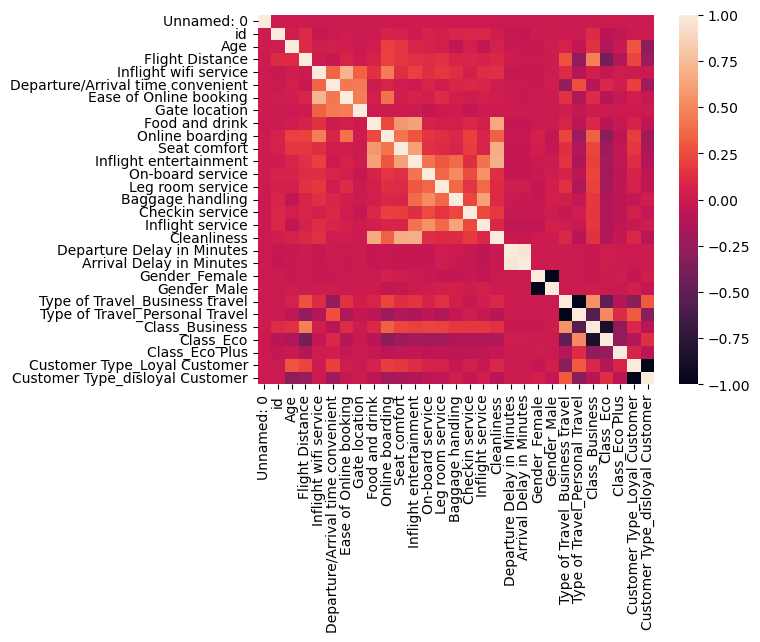

In [789]:
corrDfOld = df.corr()
sns.heatmap(corrDfOld, xticklabels=corrDfOld.columns, yticklabels=corrDfOld.columns)

<AxesSubplot:>

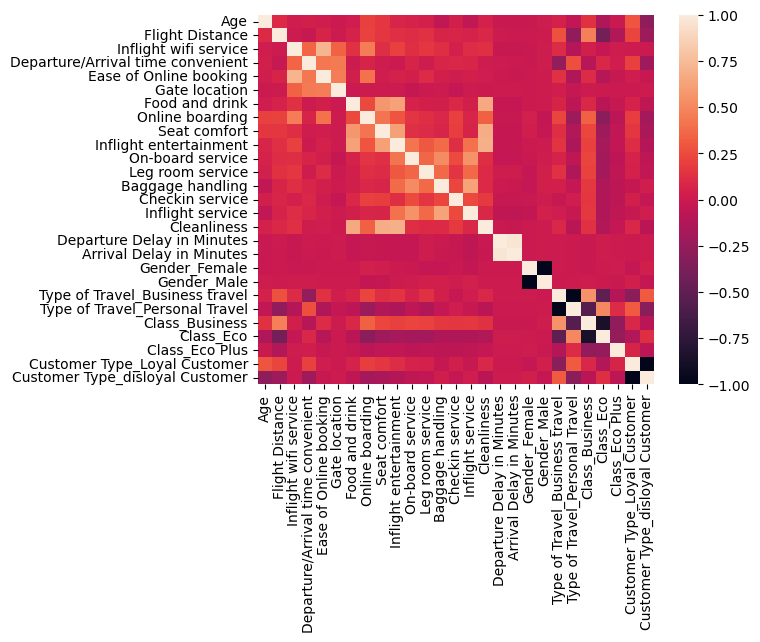

In [790]:
corrDf = df.copy()
corrDf.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
correlation = corrDf.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)

Now we officially drop those columns from our dataset and investigate what's left again.

In [791]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
dfTest.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

In [792]:
print(df.describe().round(1))

            Age  Flight Distance  Inflight wifi service  \
count  103904.0         103904.0               103904.0   
mean       39.4           1189.4                    2.7   
std        15.1            997.1                    1.3   
min         7.0             31.0                    0.0   
25%        27.0            414.0                    2.0   
50%        40.0            843.0                    3.0   
75%        51.0           1743.0                    4.0   
max        85.0           4983.0                    5.0   

       Departure/Arrival time convenient  Ease of Online booking  \
count                           103904.0                103904.0   
mean                                 3.1                     2.8   
std                                  1.5                     1.4   
min                                  0.0                     0.0   
25%                                  2.0                     2.0   
50%                                  3.0                    

# Investigation/Exploration
[Back to Top](#table-of-contents)

Now we look at certain columns. Our satisfaction (which will be our labels) are a binary option with only two answers (neutral or dissatisfied or satisfied).

In [793]:
# TODO: Keep in mind labels for graphs and other areas/overall readability for final draft.
print(df['satisfaction'].value_counts())
df['satisfaction'] = df['satisfaction'].astype('category').cat.codes
print(df['satisfaction'].value_counts())

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64
0    58879
1    45025
Name: satisfaction, dtype: int64


Now we're interested if there are still and NaN values left in our dataset. Previously, there were NaNs in the 'Arrival Delay in Minutes' column, but since we dropped that, we shouldn't have anymore NaNs.

In [794]:
# TODO: Move all NaNs to preprocessing section.
df.isna().sum()

Age                                    0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
Gender_Female                          0
Gender_Male                            0
Type of Travel_Business travel         0
Type of Travel_Personal Travel         0
Class_Business                         0
Class_Eco       

In [795]:
dfTest.isna().sum()

Age                                   0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
Gender_Female                         0
Gender_Male                           0
Type of Travel_Business travel        0
Type of Travel_Personal Travel        0
Class_Business                        0
Class_Eco                             0


These are leftover cells for when we did remove these NaNs and are being left just incase.

In [796]:
# To investigate number of NaNs in the column.
num_nans = df['Arrival Delay in Minutes'].isna().sum()
num_nansTest = dfTest['Arrival Delay in Minutes'].isna().sum()
print(num_nans)
print(num_nansTest)

310
83


In [797]:
# calculate the average of the column
average_delay = df['Arrival Delay in Minutes'].mean()
average_delayTest = dfTest['Arrival Delay in Minutes'].mean()

# replace NaNs with the average value
df['Arrival Delay in Minutes'].fillna(value=average_delay, inplace=True)
dfTest['Arrival Delay in Minutes'].fillna(value=average_delayTest, inplace=True)

In [798]:
df.isna().sum().sum()

0

In [799]:
dfTest.isna().sum().sum()

0

### Visualizations

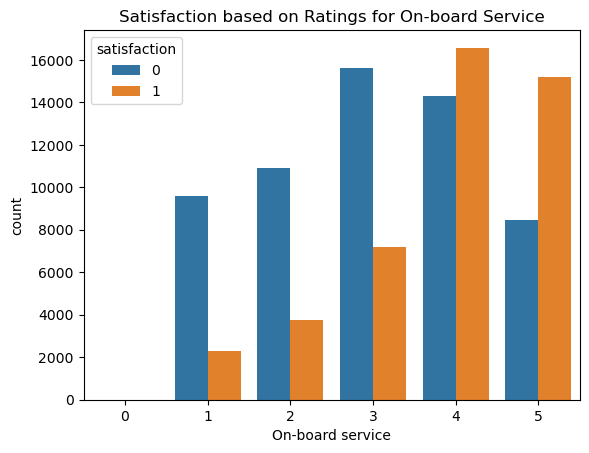

In [800]:
# Passenger's satisfaction based on the Ratings of On-board Service
# TODO: Probably have two versions of 'satisfaction' for different graph types.
sns.countplot(x=df['On-board service'], hue="satisfaction", data=df)
plt.title('Satisfaction based on Ratings for On-board Service')
plt.show()

In [801]:
# Passenger's satisfaction based off of Class

# sns.countplot(x='Class', hue='satisfaction', data=df)
# plt.title('Satisfaction based on class')
# plt.show()

Passenger's Satisfaction based off of Seat Comfort Ratings:

Text(0, 0.5, 'Satisfaction')

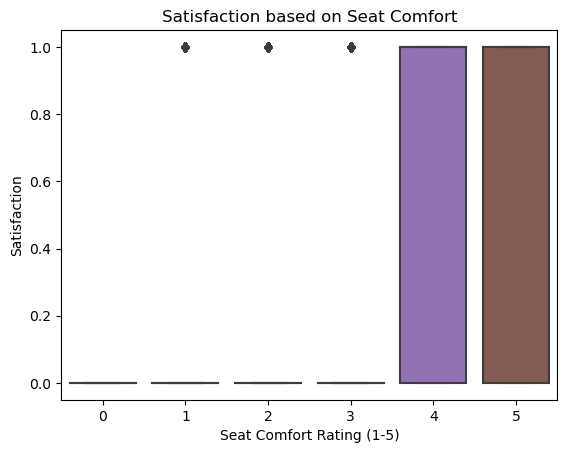

In [820]:
sns.boxplot(data=df, x = df['Seat comfort'], y = df['satisfaction'])
plt.title('Satisfaction based on Seat Comfort')

plt.xlabel('Seat Comfort Rating (1-5)')
plt.ylabel('Satisfaction')

Based on the results, it appears that passengers who rated Seat Comfort between a 4-5 (high comfort) were satisfied compared to those who rated the seat comfort less than a 4, were not satisfied. There are two outliers that have chosen to be satisfied although they rated the seat comfort a 1 or 2. 

Passenger's Satisfaction based off of Cleanliness Ratings

Text(0.5, 1.0, 'Satisfaction based on Cleanliness')

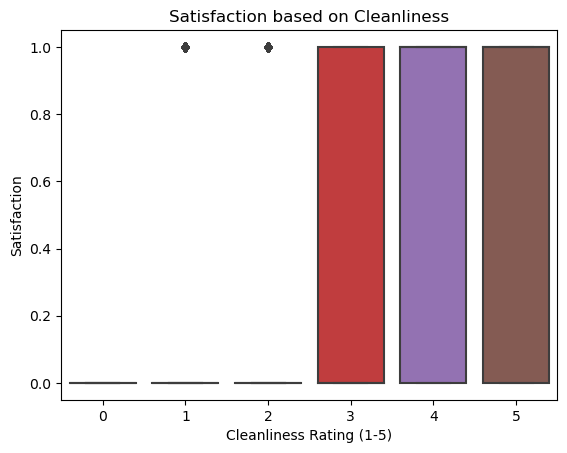

In [803]:
sns.boxplot(data=df, x=df['Cleanliness'], y = df['satisfaction'])
plt.xlabel('Cleanliness Rating (1-5)')
plt.ylabel('Satisfaction')
plt.title('Satisfaction based on Cleanliness')

This plot shows the higher the cleanliness rating (3-5), the more likely satisfied the passenger was and the lower the cleanliness rating(1-~3), the more likely they weren't satisfied.

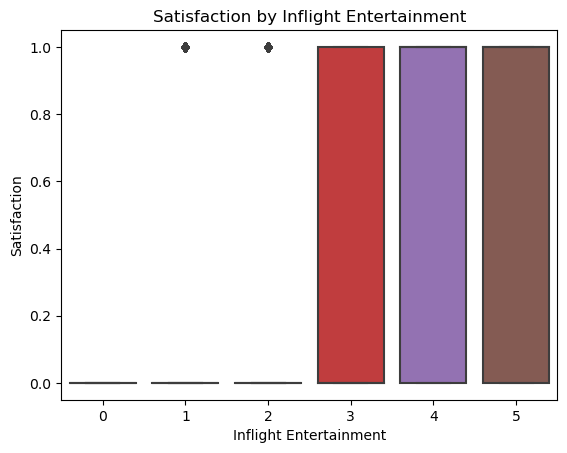

In [804]:
# Passenger's Satisfaction based off of Inflight Entertainment

sns.boxplot(x='Inflight entertainment', y='satisfaction', data=df)

plt.title('Satisfaction by Inflight Entertainment')
plt.xlabel('Inflight Entertainment')
plt.ylabel('Satisfaction')
plt.show()

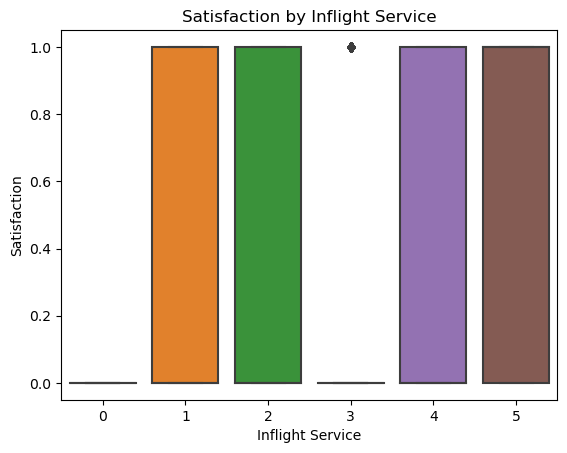

In [805]:
# Passenger's Satisfaction based off of Inflight Service
sns.boxplot(x='Inflight service', y='satisfaction', data=df)
plt.title('Satisfaction by Inflight Service')
plt.xlabel('Inflight Service')
plt.ylabel('Satisfaction')
plt.show()

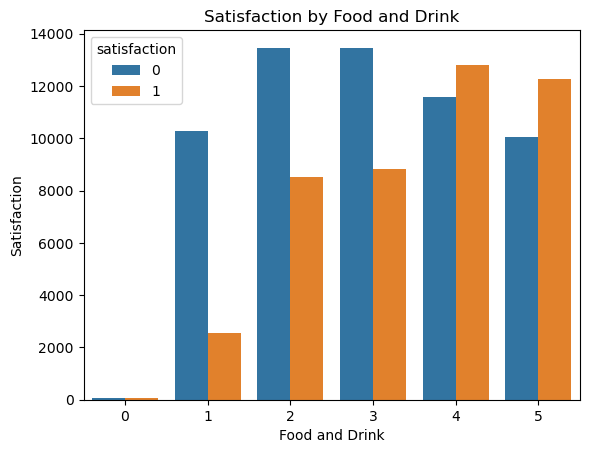

In [806]:
sns.countplot(x='Food and drink', hue='satisfaction', data=df)
plt.title('Satisfaction by Food and Drink')
plt.xlabel('Food and Drink')
plt.ylabel('Satisfaction')
plt.show()

# Training
[Back to Top](#table-of-contents)

Since we have only two results in our *satisfaction* column (neutral or dissatisfied & satisfied), we are going to use either kNN Classifier or a Decision Tree Classifier for our project.

To prep for the actual machine learning, we'll first label encode *Y* so we can use y_train & y_test in all subsequent trials without having to redeclare/tweak it.

In [807]:
y_train = df['satisfaction'].values
y_test = dfTest['satisfaction'].astype('category').cat.codes

A helper function that simulates train_test_split but also with the added feature of normalizing our data. Also only works for X since we already did Y earlier.

In [808]:
def x_train_test_split(predictors):
    scaler = StandardScaler()
    xPred = scaler.fit_transform(df[predictors].values)
    testPred = scaler.fit_transform(dfTest[predictors].values)
    return (xPred, testPred)

In [809]:
# TODO: Make it so there are only TWO kNN Cells, one of a smaller one and a larger one with algorithm changes. This is to demonstrate that kNN was too slow and that compared to a decision tree we only lose a few percent accuracy.
# TODO: see what the fastest kNN is and if it isn't close to decision trees, don't bother with trying to optimize that.
# TODO: Similar to Lin Reg Assignment, try to find the best 10 and compare that to all features.
# TODO: Graph some of the results of each machine learning cell to see predicted vs actual. For example, accuracy when different predictors are added.

# TODO: GridSearch with different hyper-parameters for decision tree
# parameters = [{'max_depth': [1, 3, 5, 7, 9, 11, 13, 15], 'min_samples_leaf': [
#     0.1, 0.2, 0.3, 0.4, 0.5, 1], 'max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}]
# test = GridSearchCV(reg, parameters, scoring='accuracy', cv=10)
# test.fit(X_train, y_train)
# print(test.best_params_)

# TODO: Export Graphviz for decision trees and talk about them (features like gini, etc.)
# TODO: For the final decision tree model, use a confusion matrix.
# TODO: See if we can graph a learning curve?

predictors = ['Inflight entertainment','On-board service','Leg room service','Baggage handling']
X_train, X_test = x_train_test_split(predictors)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)
accuracy = (predictions == y_test).mean()
print(accuracy.round(2))

c:\Users\warre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.73


In [810]:
predictors = ['Seat comfort', 'Inflight entertainment', 'Cleanliness', 'Food and drink','Inflight service', 'Cleanliness']
X_train, X_test = x_train_test_split(predictors)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)
accuracy = (predictions == y_test).mean()
print(accuracy.round(2))

c:\Users\warre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.73


In [811]:
dfCopy = df.copy()
dfCopy.drop('satisfaction', inplace=True, axis=1)
predictors = dfCopy.columns
X_train, X_test = x_train_test_split(predictors)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)
accuracy = (predictions == y_test).mean()
print(accuracy.round(2))

c:\Users\warre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.93


Now we're trying knn but with hyper-parameter changes for speed.

In [812]:
dfCopy = df.copy()
dfCopy.drop('satisfaction', inplace=True, axis=1)
predictors = dfCopy.columns
X_train, X_test = x_train_test_split(predictors)

knn = KNeighborsClassifier(algorithm='brute') # 25s
# knn = KNeighborsClassifier(algorithm='ball_tree') # over a min
# knn = KNeighborsClassifier(algorithm='kd_tree') # 40s
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)
accuracy = (predictions == y_test).mean()
print(accuracy.round(2))

c:\Users\warre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.93


In [813]:
predictors = ['Seat comfort', 'Inflight entertainment', 'Cleanliness', 'Food and drink']
# TODO: Does scaling X for Decision trees mess with it?
X_train, X_test = x_train_test_split(predictors)

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

predictions = tree.predict(X_test)
accuracy = (predictions == y_test).mean()
print(accuracy.round(2))

0.7


In [814]:
dfCopy = df.copy()
dfCopy.drop('satisfaction', inplace=True, axis=1)
predictors = dfCopy.columns
X_train, X_test = x_train_test_split(predictors)

tree = DecisionTreeClassifier(max_depth=4)
# tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

predictions = tree.predict(X_test)
accuracy = (predictions == y_test).mean()
print(accuracy.round(2))

0.89


In [815]:
# TODO: Setup Cross-Validation to measure scores of tests
# scores = cross_val_score(LinearRegression(), X_0, y_train, scoring='neg_mean_squared_error', cv=5)
#     rmse = np.sqrt(-scores.mean())

In [816]:
def edist(x, y):
    return np.sqrt(np.sum((x-y)**2))
def dist(x):
    m = x.shape[0]
    dm = np.zeros((m,m))
    for i in range(m):
        for j in range(i, m):
            dm[i,j] = edist(x[i,:], x[j, :])
            dm[j,i] = dm[i,j]
    return dm

def knn_anomalies(dfCopy, k=3, threshold=3):
    dm = dist(x)
    sorted_distances = np.appy_along_axis(np.sort, 1, dm)
    dist_to_k_nearest = sorted_distances[:,k]

    dist_std = np.std(dist_to_k_nearest)
    dist_mean = np.mean(dist_to_k_nearest)
    dist_scaled = (dist_to_k_nearest - dist_mean)/dist_std
    
    anomaly_indexes = np.where(dist_scaled > threshold)
    return anomaly_indexes

anoms = knn_anomalies((dfCopy.columns).values, k = 3, threshold = 3)

MemoryError: Unable to allocate 80.4 GiB for an array with shape (103904, 103904) and data type float64

In [ ]:
# TODO: make a specific customer and test our model